<a href="https://colab.research.google.com/github/fernando45y2/instacart_exercise_RUN-Proyect/blob/main/instacart_exercise_RUN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import re
import pandas as pd

In [ ]:
#"""
# loading datasets
products = pd.read_csv("products.csv")
products['product_name'] = products['product_name'].replace(to_replace="[^a-z\dA-Z \s+ ]", value="~", regex=True)
order_products_train = pd.read_csv("order_products__train.csv")

# Merging datasets
full = order_products_train.merge(products, on='product_id',how='outer', indicator=True)
# lost 10565 observations that only appear in products

# reset index and organize by values data
full =full[full['_merge']=='both'].reset_index(drop=True)
full =full.sort_values('order_id')


# Pass the transaction to list of lists,
# keeping the transactions in data.
transactions ={}
for iden in full['order_id'].unique():
    transactions[iden]=[]
for index in full.index:
    transactions[full.loc[index,'order_id']].append(full.loc[index,'product_name'])

data = []
for t in transactions:
    data.append(transactions[t])


# Pass data to a csv file

with open('TransactionsInstacart.csv','w') as f:
    for transaction in data:
        for item in transaction:
            f.write(str(item) + ',')
        f.write('\n')

In [ ]:
# run apriori algorithm

In [ ]:
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [ ]:
%%R
#install.packages("arules")

NULL


In [ ]:
%%R
library("arules")
# After that we can the products we can describe the aisles and departments!

In [ ]:
%%R
baskets <- read.transactions('TransactionsInstacart.csv', sep=',')

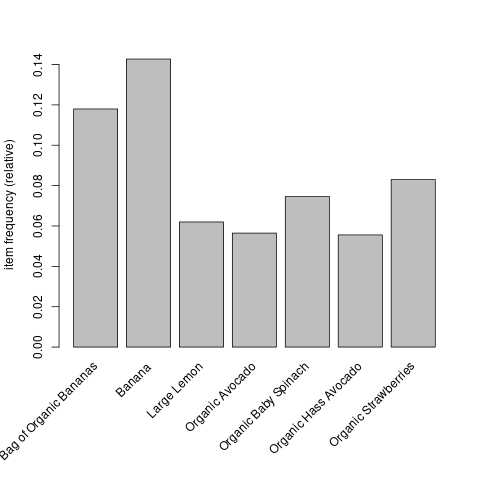

In [ ]:
%%R
itemFrequencyPlot(baskets,support=0.055)  #minsuport
# we can uses topN=# to see the more

In [ ]:
counter = pd.DataFrame([len(T) for T in data], columns=['k-itemset'])

In [ ]:
to_testing = pd.DataFrame(counter['k-itemset'].value_counts().sort_index())

In [ ]:
to_testing['k-itemset'].sum()

131209

In [ ]:
to_testing[['k-itemset']].cumsum().to_excel('cumulativedistribution.xlsx')

In [ ]:
to_testing['k-itemset'].value_counts()

2      6
1      3
3      3
4      3
5      2
      ..
860    1
679    1
634    1
553    1
403    1
Name: k-itemset, Length: 63, dtype: int64

<AxesSubplot:>

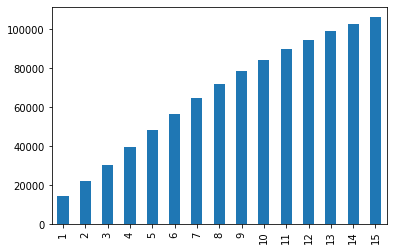

In [ ]:
import pandas as pd
cumsum = pd.read_excel('cumulativedistribution.xlsx')
cumsum[1:16]['k-itemset'].plot(kind='bar')

<AxesSubplot:>

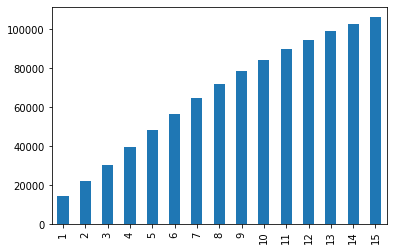

In [ ]:
cumsum[1:16]['k-itemset'].plot(kind='bar')

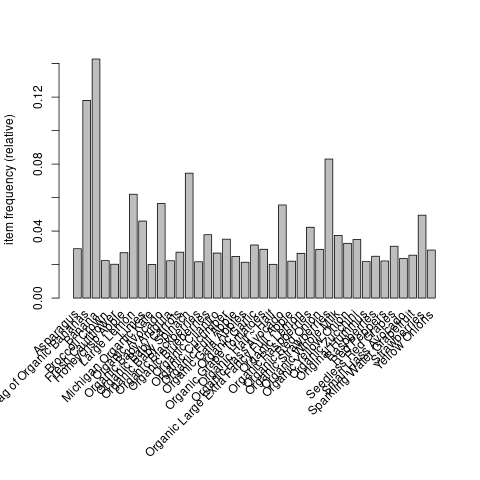

In [ ]:
%%R
itemFrequencyPlot(baskets,support=0.02)  #minsuport

In [ ]:
%%R
Rules <- apriori(baskets, parameter=list(support=0.001, confidence=0.3, minlen=2 , maxlen=15))
rulesordered <- sort(Rules, by = "lift")
inspect(rulesordered)

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.3    0.1    1 none FALSE            TRUE       5   0.001      2
 maxlen target  ext
     15  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 131 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[39123 item(s), 131209 transaction(s)] done [0.83s].
sorting and recoding items ... [1865 item(s)] done [0.03s].
creating transaction tree ... done [0.08s].
checking subsets of size 1 2 3 4 done [0.08s].
writing ... [347 rule(s)] done [0.01s].
creating S4 object  ... done [0.04s].
      lhs                                                        rhs                                                         support confidence    coverage      lift count
[1]   {Strawberry Rhubarb Yoghurt}                            => {Blueberry Yoghurt}                       

       Organic Cilantro}                                      => {Limes}                                                 0.001585257  0.3513514 0.004511886  7.641382   208
[29]  {Bag of Organic Bananas,                                                                                                                                             
       Organic Hass Avocado,                                                                                                                                               
       Organic Strawberries}                                  => {Organic Raspberries}                                   0.001737686  0.3211268 0.005411214  7.597317   228
[30]  {Organic Cilantro,                                                                                                                                                   
       Organic Yellow Onion}                                  => {Limes}                                                 0.001150836  0.3363

       Organic Strawberries}                                  => {Organic Hass Avocado}                                  0.001615743  0.3131462 0.005159707  5.633841   212
[49]  {Bag of Organic Bananas,                                                                                                                                             
       Organic Red Bell Pepper}                               => {Organic Hass Avocado}                                  0.001493800  0.3116057 0.004793878  5.606126   196
[50]  {Organic Cucumber,                                                                                                                                                   
       Organic Raspberries}                                   => {Organic Hass Avocado}                                  0.001341371  0.3109541 0.004313728  5.594402   176
[51]  {Limes,                                                                                                                               

[71]  {Organic Hass Avocado,                                                                                                                                               
       Organic Kiwi}                                          => {Organic Strawberries}                                  0.001028893  0.3879310 0.002652257  4.672301   135
[72]  {Organic Grape Tomatoes,                                                                                                                                             
       Organic Raspberries}                                   => {Organic Strawberries}                                  0.001135593  0.3870130 0.002934250  4.661244   149
[73]  {Organic Cucumber,                                                                                                                                                   
       Organic Raspberries}                                   => {Organic Strawberries}                                  0.001661471  0.3851

       Organic Whole Milk}                                    => {Organic Strawberries}                                  0.001242293  0.3505376 0.003543964  4.221929   163
[94]  {Banana,                                                                                                                                                             
       Organic Raspberries}                                   => {Organic Strawberries}                                  0.002400750  0.3503893 0.006851664  4.220143   315
[95]  {Organic Baby Spinach,                                                                                                                                               
       Organic Hass Avocado,                                                                                                                                               
       Organic Strawberries}                                  => {Bag of Organic Bananas}                                0.001242293  0.4939

[116] {Bag of Organic Bananas,                                                                                                                                             
       Organic D~Anjou Pears}                                 => {Organic Strawberries}                                  0.001493800  0.3245033 0.004603343  3.908367   196
[117] {Organic Large Extra Fancy Fuji Apple,                                                                                                                               
       Organic Raspberries}                                   => {Bag of Organic Bananas}                                0.001524286  0.4608295 0.003307700  3.906006   200
[118] {Organic Hass Avocado,                                                                                                                                               
       Organic Red Bell Pepper}                               => {Organic Strawberries}                                  0.001059379  0.3240

[140] {Bag of Organic Bananas,                                                                                                                                             
       Fresh Cauliflower}                                     => {Organic Strawberries}                                  0.001379479  0.3088737 0.004466157  3.720122   181
[141] {Organic Cucumber,                                                                                                                                                   
       Organic Hass Avocado}                                  => {Organic Strawberries}                                  0.001951086  0.3080626 0.006333407  3.710353   256
[142] {Organic Hass Avocado,                                                                                                                                               
       Organic Tomato Cluster}                                => {Bag of Organic Bananas}                                0.001630986  0.4358

[165] {Organic Grape Tomatoes,                                                                                                                                             
       Organic Hass Avocado}                                  => {Bag of Organic Bananas}                                0.001585257  0.4176707 0.003795471  3.540191   208
[166] {Organic Hass Avocado,                                                                                                                                               
       Organic Whole Milk}                                    => {Bag of Organic Bananas}                                0.001470936  0.4150538 0.003543964  3.518010   193
[167] {Fresh Cauliflower,                                                                                                                                                  
       Organic Hass Avocado}                                  => {Bag of Organic Bananas}                                0.001173700  0.4139

       Organic Fuji Apple}                                    => {Banana}                                                0.001303264  0.4621622 0.002819929  3.238270   171
[189] {Organic Grade A Free Range Large Brown Eggs,                                                                                                                        
       Organic Strawberries}                                  => {Bag of Organic Bananas}                                0.001089864  0.3813333 0.002858036  3.232194   143
[190] {Organic Garlic,                                                                                                                                                     
       Organic Hass Avocado}                                  => {Bag of Organic Bananas}                                0.001905357  0.3805175 0.005007278  3.225279   250
[191] {Organic Raspberries,                                                                                                                 

[213] {Organic Honey Sweet Whole Wheat Bread}                 => {Bag of Organic Bananas}                                0.001036514  0.3550914 0.002919007  3.009766   136
[214] {Organic Whole Grassmilk Milk}                          => {Bag of Organic Bananas}                                0.001295643  0.3541667 0.003658286  3.001929   170
[215] {Large Lemon,                                                                                                                                                        
       Organic Fuji Apple}                                    => {Banana}                                                0.001204186  0.4270270 0.002819929  2.992085   158
[216] {Limes,                                                                                                                                                              
       Organic Raspberries}                                   => {Bag of Organic Bananas}                                0.001105107  0.3527

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



                                                                                                          
       Organic Baby Carrots}                                  => {Banana}                                                0.001105107  0.3766234 0.002934250  2.638918   145
[272] {Large Lemon,                                                                                                                                                        
       Limes,                                                                                                                                                              
       Organic Avocado}                                       => {Banana}                                                0.001112729  0.3753213 0.002964736  2.629795   146
[273] {Organic Bosc Pear}                                     => {Bag of Organic Bananas}                                0.001669093  0.3101983 0.005380728  2.629251   219
[274] {Organic Chicken ~ Apple Sa

[299] {Broccoli Crown,                                                                                                                                                     
       Organic Baby Spinach}                                  => {Banana}                                                0.001387100  0.3513514 0.003947900  2.461842   182
[300] {Organic Blackberries,                                                                                                                                               
       Strawberries}                                          => {Banana}                                                0.001089864  0.3504902 0.003109543  2.455808   143
[301] {Honeycrisp Apple,                                                                                                                                                   
       Organic Baby Spinach}                                  => {Banana}                                                0.001318507  0.3487

[325] {Large Lemon,                                                                                                                                                        
       Red Peppers}                                           => {Banana}                                                0.001089864  0.3213483 0.003391536  2.251618   143
[326] {Large Lemon,                                                                                                                                                        
       Organic Baby Carrots}                                  => {Banana}                                                0.001021271  0.3213429 0.003178136  2.251580   134
[327] {Organic Baby Spinach,                                                                                                                                               
       Seedless Red Grapes}                                   => {Banana}                                                0.001204186  0.3211

In [ ]:
%%R
write(Rules,
      file = "rulesdatabase.csv",
      sep = ",",
      quote = TRUE,
      row.names = FALSE)

In [ ]:
pyrules = pd.read_csv("rulesdatabase.csv", sep=',')

In [ ]:
pyrules.sort_values(by=['lift'], ascending=False , inplace=True)

In [ ]:
pyrules.reset_index(inplace=True)

In [ ]:
pyrules.to_excel("rules.xlsx")

In [ ]:
len(data)

131209

In [ ]:
pyrules

,index,rules,support,confidence,coverage,lift,count
0,13,{Blueberry Yoghurt} => {Strawberry Rhubarb Yog...,0.001197,0.310277,0.003856,80.298014,157
1,14,{Strawberry Rhubarb Yoghurt} => {Blueberry Yog...,0.001197,0.309665,0.003864,80.298014,157
2,3,{Nonfat Icelandic Style Strawberry Yogurt} => ...,0.001166,0.422652,0.002759,78.660621,153
3,7,{Non Fat Acai ~ Mixed Berries Yogurt} => {Icel...,0.001288,0.402381,0.003201,74.887947,169
4,21,{Icelandic Style Skyr Blueberry Non~fat Yogurt...,0.001677,0.312057,0.005373,71.084466,220
...,...,...,...,...,...,...,...
342,29,{Vine Ripe Tomatoes} => {Banana},0.001661,0.307910,0.005396,2.157455,218
343,26,{Berry Medley} => {Banana},0.001562,0.307346,0.005083,2.153509,205
344,28,{Total 2~ Greek Strained Yogurt with Cherry 5~...,0.001501,0.304012,0.004939,2.130148,197
345,169,"{Organic Baby Spinach,Small Hass Avocado} => {...",0.001014,0.303653,0.003338,2.127630,133


In [ ]:
data

[['Bulgarian Yogurt',
  'Lightly Smoked Sardines in Olive Oil',
  'Bag of Organic Bananas',
  'Organic Hass Avocado',
  'Organic Whole String Cheese',
  'Cucumber Kirby',
  'Organic 4~ Milk Fat Whole Milk Cottage Cheese',
  'Organic Celery Hearts'],
 ['Asparagus',
  'Grated Pecorino Romano Cheese',
  'Spring Water',
  'Organic Half ~ Half',
  'Super Greens Salad',
  'Cage Free Extra Large Grade AA Eggs',
  'Prosciutto~ Americano',
  'Organic Garnet Sweet Potato ~Yam~'],
 ['Fresh Dill',
  'Flat Parsley~ Bunch',
  'Bunched Cilantro',
  'Green Peas',
  'Organic Hot House Tomato',
  'Organic Raw Unfiltered Apple Cider Vinegar',
  'Organic Biologique Limes',
  'Organic Baby Arugula',
  'Shelled Pistachios'],
 ['Organic Grape Tomatoes',
  'Organic Raspberries',
  'Organic Whole Strawberries',
  'Organic Blueberries',
  'Roasted Turkey',
  'Organic Cucumber',
  'Organic Pomegranate Kernels'],
 ['Organic Raspberries',
  'Natural Spring Water',
  'Organic Orange Juice With Calcium ~ Vitamin D',

In [ ]:
# Running only product ID

In [ ]:
order_products_train

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1
...,...,...,...,...
1384612,3421063,14233,3,1
1384613,3421063,35548,4,1
1384614,3421070,35951,1,1
1384615,3421070,16953,2,1


In [ ]:
transactions ={}
for iden in order_products_train['order_id'].unique():
    transactions[iden]=[]
for index in order_products_train.index:
    transactions[order_products_train.loc[index,'order_id']].append(order_products_train.loc[index,'product_id'])
data = []
for t in transactions:
    data.append(transactions[t])

In [ ]:
data

[[49302, 11109, 10246, 49683, 43633, 13176, 47209, 22035],
 [39612, 19660, 49235, 43086, 46620, 34497, 48679, 46979],
 [11913, 18159, 4461, 21616, 23622, 32433, 28842, 42625, 39693],
 [20574, 30391, 40706, 25610, 27966, 24489, 39275],
 [8859,
  19731,
  43654,
  13176,
  4357,
  37664,
  34065,
  35951,
  43560,
  9896,
  27509,
  15455,
  27966,
  47601,
  40396,
  35042,
  40986,
  1939,
  46313,
  329,
  30776,
  36695,
  27683,
  15995,
  27344,
  47333,
  48287,
  45204,
  24964,
  18117,
  46413,
  34126,
  9373,
  22935,
  46720,
  44479,
  790,
  18441,
  45007,
  20520,
  7461,
  26317,
  3880,
  36364,
  32463,
  41387,
  31066,
  17747,
  25659],
 [27104, 21174, 41860, 38273, 47209, 5876, 29217, 9047, 4549, 22425, 11776],
 [18394,
  37766,
  13176,
  6236,
  5077,
  8153,
  43772,
  25591,
  34582,
  49593,
  15093,
  43841,
  21137,
  40354,
  17794,
  11182,
  39190],
 [1194, 5578, 38159, 10305, 38557],
 [28199,
  24852,
  29883,
  28427,
  7754,
  39947,
  47307,
  36291,

In [ ]:
with open('Twithproduct.csv','w') as f:
    for transaction in data:
        for item in transaction:
            f.write(str(item) + ',')
        f.write('\n')

In [ ]:
%%R
basketsT <- read.transactions('Twithproduct.csv', sep=',')

In [ ]:
%%R
Rules <- apriori(basketsT, parameter=list(support=0.001, confidence=0.3, minlen=2 , maxlen=15))
rulesordered <- sort(Rules, by = "lift")
inspect(rulesordered)

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.3    0.1    1 none FALSE            TRUE       5   0.001      2
 maxlen target  ext
     15  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 131 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[39123 item(s), 131209 transaction(s)] done [0.91s].
sorting and recoding items ... [1865 item(s)] done [0.03s].
creating transaction tree ... done [0.08s].
checking subsets of size 1 2 3 4 done [0.08s].
writing ... [347 rule(s)] done [0.01s].
creating S4 object  ... done [0.05s].
      lhs                      rhs     support     confidence coverage   
[1]   {17758}               => {40198} 0.001196564 0.3096647  0.003864064
[2]   {40198}               => {17758} 0.001196564 0.3102767  0.003856443
[3]   {8309}                => {28465} 0.001166079 0.4226

[100] {30391, 47766}        => {21903} 0.001272779 0.3047445  0.004176543
[101] {21137, 8174}         => {13176} 0.001539529 0.4821002  0.003193379
[102] {39275, 47209}        => {21137} 0.001249914 0.3381443  0.003696393
[103] {40706, 47626}        => {21903} 0.001333750 0.3032929  0.004397564
[104] {27966, 39928}        => {13176} 0.001143214 0.4792332  0.002385507
[105] {27966, 45007}        => {21137} 0.001051757 0.3365854  0.003124786
[106] {26604, 27966}        => {21137} 0.001257536 0.3360489  0.003742121
[107] {13176, 26604}        => {21137} 0.001257536 0.3353659  0.003749743
[108] {13176, 30391}        => {21137} 0.003231486 0.3343849  0.009663971
[109] {27966, 47766}        => {21137} 0.001219429 0.3340292  0.003650664
[110] {16759, 47209}        => {13176} 0.001074621 0.4731544  0.002271186
[111] {13176, 39275}        => {21137} 0.002850414 0.3289358  0.008665564
[112] {27966, 47626}        => {21137} 0.001257536 0.3286853  0.003825957
[113] {13176, 21903, 47209} => {21137}

[210] {21903, 37646}        => {13176} 0.001265157 0.3600868  0.003513478
[211] {21137, 21903}        => {13176} 0.004473778 0.3581452  0.012491521
[212] {21137, 27845}        => {13176} 0.002583664 0.3553459  0.007270843
[213] {3896}                => {13176} 0.001036514 0.3550914  0.002919007
[214] {329}                 => {13176} 0.001295643 0.3541667  0.003658286
[215] {28204, 47626}        => {24852} 0.001204186 0.4270270  0.002819929
[216] {26209, 27966}        => {13176} 0.001105107 0.3527981  0.003132407
[217] {16797, 26209}        => {24852} 0.001310886 0.4246914  0.003086679
[218] {21137, 43961}        => {13176} 0.001211807 0.3509934  0.003452507
[219] {39928}               => {13176} 0.004984414 0.3478723  0.014328285
[220] {21137, 8518}         => {13176} 0.001577636 0.3467337  0.004549993
[221] {21137, 40706}        => {13176} 0.001958707 0.3463612  0.005655100
[222] {47766, 8424}         => {24852} 0.001516664 0.4189474  0.003620178
[223] {16797, 47626}        => {24852}

[320] {28842, 47626}        => {24852} 0.001021271 0.3260341  0.003132407
[321] {21137, 47626}        => {24852} 0.002522693 0.3254671  0.007750993
[322] {47759}               => {24852} 0.001211807 0.3251534  0.003726878
[323] {22935, 47766}        => {24852} 0.001120350 0.3245033  0.003452507
[324] {21616, 47766}        => {24852} 0.001059379 0.3217593  0.003292457
[325] {24184, 47626}        => {24852} 0.001089864 0.3213483  0.003391536
[326] {42265, 47626}        => {24852} 0.001021271 0.3213429  0.003178136
[327] {21903, 4920}         => {24852} 0.001204186 0.3211382  0.003749743
[328] {37766}               => {24852} 0.001547150 0.3196850  0.004839607
[329] {45}                  => {24852} 0.001509043 0.3168000  0.004763393
[330] {8424}                => {24852} 0.007049821 0.3154843  0.022346028
[331] {28199}               => {24852} 0.003551586 0.3152909  0.011264471
[332] {13517}               => {24852} 0.001196564 0.3152610  0.003795471
[333] {9387}                => {24852}

[278]  2.603072 1210 
[279]  2.601320  186 
[280]  2.587932  147 
[281]  2.586044  148 
[282]  2.585717  687 
[283]  2.580293 1067 
[284]  2.580140  235 
[285]  2.579662  133 
[286]  2.563556  173 
[287]  2.561802  151 
[288]  2.561786  243 
[289]  2.533960  132 
[290]  2.530967  190 
[291]  2.498199  169 
[292]  2.488390  190 
[293]  2.478814  150 
[294]  2.478463  133 
[295]  2.477565  477 
[296]  2.469891  141 
[297]  2.469753  135 
[298]  2.468634  167 
[299]  2.461842  182 
[300]  2.455808  143 
[301]  2.443898  173 
[302]  2.440782  379 
[303]  2.437674  199 
[304]  2.430169  197 
[305]  2.428991 1231 
[306]  2.421461  188 
[307]  2.418889  484 
[308]  2.413970  154 
[309]  2.410633  257 
[310]  2.408581  165 
[311]  2.404472  256 
[312]  2.390940  216 
[313]  2.378387  352 
[314]  2.377804  169 
[315]  2.367977  195 
[316]  2.346689  141 
[317]  2.339187  217 
[318]  2.321608  166 
[319]  2.288647  260 
[320]  2.284450  134 
[321]  2.280477  331 
[322]  2.278279  159 
[323]  2.2

In [ ]:
## Regex quit all characters different to words

In [ ]:
data = pd.DataFrame({'products':['mang,`o12!', 'papay41!qa', 'frutao_.__.\nh', '1,a3,5;']})

In [ ]:
data

,products
0,"mang,`o12!"
1,papay41!qa
2,frutao_.__.\nh
3,"1,a3,5;"


In [ ]:
data.replace(to_replace="[^A-Za-z\d]", value="~", regex=True)

,products
0,mang~~o12~
1,papay41~qa
2,frutao~~~~~~h
3,1~a3~5~


In [ ]:
products = pd.read_csv("products.csv")
print(products['product_name'].unique().shape[0])
products['changed'] = products['product_name'].replace(to_replace="[^a-z\dA-Z \s+ ]", value="~", regex=True)
print(products['changed'].unique().shape[0])
products.head()  # if dont change this characters the things is remain

49688
49688


,product_id,product_name,aisle_id,department_id,changed
0,1,Chocolate Sandwich Cookies,61,19,Chocolate Sandwich Cookies
1,2,All-Seasons Salt,104,13,All~Seasons Salt
2,3,Robust Golden Unsweetened Oolong Tea,94,7,Robust Golden Unsweetened Oolong Tea
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1,Smart Ones Classic Favorites Mini Rigatoni Wit...
4,5,Green Chile Anytime Sauce,5,13,Green Chile Anytime Sauce


In [ ]:
chain = ''
for chars in idenChars('product_name', products):
    chain = chain +chars
chain

' -\'&®,/%\\"!.é()+;í™:ó=èñ°‑#–*û$\xa0ç’е@á?˚´úüâ�”ô`\x8f{}'

In [ ]:
products

,product_id,product_name,aisle_id,department_id,changed
0,1,Chocolate Sandwich Cookies,61,19,Chocolate Sandwich Cookies
1,2,All-Seasons Salt,104,13,All~Seasons Salt
2,3,Robust Golden Unsweetened Oolong Tea,94,7,Robust Golden Unsweetened Oolong Tea
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1,Smart Ones Classic Favorites Mini Rigatoni Wit...
4,5,Green Chile Anytime Sauce,5,13,Green Chile Anytime Sauce
...,...,...,...,...,...
49683,49684,"Vodka, Triple Distilled, Twist of Vanilla",124,5,Vodka~ Triple Distilled~ Twist of Vanilla
49684,49685,En Croute Roast Hazelnut Cranberry,42,1,En Croute Roast Hazelnut Cranberry
49685,49686,Artisan Baguette,112,3,Artisan Baguette
49686,49687,Smartblend Healthy Metabolism Dry Cat Food,41,8,Smartblend Healthy Metabolism Dry Cat Food


In [ ]:
!pip install rapidfuzz

Defaulting to user installation because normal site-packages is not writeable


In [ ]:
from rapidfuzz import process, fuzz
df = pd.DataFrame(['wijk 00 book', 'Wijk a', 'test'], columns=['col1'])
search_str = 'book'
most_similar = process.extractOne(search_str, df['col1'], scorer=fuzz.WRatio)
most_similar

('wijk 00 book', 90.0, 0)

In [ ]:
data = pd.DataFrame({'products':['mang,`o12!', 'papay41!qa', 'frutao_.__.\nh', '1,a3,5;']})

In [ ]:
# A program to find not numeric and not alphatically characters

In [ ]:
# Now we are goint to capture all not alphanumeric characters presented in the column
string = 'asasd//nasdn4(/`nasd~~~nasd)'
rey_occurences = "[^a-z\d]"
re.findall(rey_occurences, string)

['/', '/', '(', '/', '`', '~', '~', '~', ')']

In [ ]:
def idenChars(col_name, data):
    pattern_regex = "[^a-zA-Z\d]"
    uniques = []
    for index in data.index:
        for char in  re.findall(pattern_regex, data.loc[index,col_name]):
            if char not in uniques:
                uniques.append(char)
    return uniques

In [ ]:
string = 'asasd//nasdn4(/`nasd~~~ * *nasd )  asdasd '
rey_occurences = "[^a-z\d *]"
re.findall(rey_occurences, string)

['/', '/', '(', '/', '`', '~', '~', '~', ')']